# Data Exploration

In [ ]:
# # Create a test set not for training, but at least for having an idea what to expect of my algorithm
# # If it is able to generalize or not.

# import nltk
# from nltk.corpus import words
# import csv

# DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_250000_train.txt"

# def load_csv_as_strings(file_path):
#     with open(file_path, newline='') as csvfile:
#         reader = csv.reader(csvfile)
#         lines = [''.join(row) for row in reader]
#     return lines

# words_list = load_csv_as_strings(DATASETPATH)

# # Download the words corpus if not already present
# nltk.download('words')

# # Get the list of all English words
# all_english_words = set(words.words())

# # Exclude the words present in the provided file
# new_words_set = all_english_words - set(words_list)

# # Convert the set to a list and ensure it contains 250,000 words
# new_words_list = list(new_words_set)[:250000]

# # Check the number of words in the new list
# len(new_words_list)

# # Save the new list of words to a file
# # with open('words_130438_test.txt', 'w') as f:
# #     for word in new_words_list:
# #         # Lowercase the word and write it to the file
# #         f.write(word.lower() + '\n')

In [12]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


# Load the dataset consider all types string
DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_250000_train.txt"
TEST_DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_130438_test.txt"

def load_dataset(file_path):
    def load_csv_as_strings(file_path):
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            lines = [''.join(row) for row in reader]
        return lines

    lines = load_csv_as_strings(DATASETPATH)

    df = pd.DataFrame(lines, columns=["word"], dtype=str)

    # Get the length of each word
    df["word_length"] = df["word"].apply(len)

    # Get the unique characters in each word
    df["unique_chars"] = df["word"].apply(lambda x: len(set(x)))

    return df

# Split randomly df into train and validation sets (85% train, 15% validation)
def split_train_val(df, train_size=0.85):
    # Randomly shuffle the dataset
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split the dataset into train and validation sets
    train_df = df.iloc[:int(train_size * len(df))]
    val_df = df.iloc[int(train_size * len(df)):]

    return train_df, val_df

# Load the dataset
df = load_dataset(DATASETPATH)
df_train, df_val = split_train_val(df,  train_size=0.85)
df_test = load_dataset(TEST_DATASETPATH)


# Number of words
num_words = len(df)
print(f"Total number of words: {num_words}")

# Descriptive statistics
print(df['word_length'].describe())

# Descriptive statistics
print(df['unique_chars'].describe())



Total number of words: 227300
count    227300.000000
mean          9.347761
std           2.981242
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          29.000000
Name: word_length, dtype: float64
count    227300.000000
mean          7.396432
std           1.988945
min           1.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          16.000000
Name: unique_chars, dtype: float64


In [16]:
# Check for duplicates
duplicate_words = df[df.duplicated()]
print(f"Number of duplicate words: {len(duplicate_words)}")

# Remove duplicates
df = df.drop_duplicates()

# Check for non-alphabetic characters
non_alpha_words = df[df['word'].str.contains(r'[^a-zA-Z]')]
print(f"Number of words with non-alphabetic characters: {len(non_alpha_words)}")

# Remove non-alphabetic words
df = df[df['word'].str.isalpha()]

# Convert all words to lowercase
df['word'] = df['word'].str.lower()

Number of duplicate words: 0
Number of words with non-alphabetic characters: 0


In [ ]:

def plot_histograms(df, title = "df_train"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the first histogram for unique_chars
    df["unique_chars"].hist(bins=50, ax=axs[0])
    axs[0].set_xlabel('Unique characters in word')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title(f'Histogram of Unique Characters: {title}')

    # Plot the second histogram for word_length
    df["word_length"].hist(bins=50, ax=axs[1])
    axs[1].set_xlabel('Word length')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Word Length: {title}')

    plt.tight_layout()
    plt.show()

plot_histograms(df_train, title = "df_train")

plot_histograms(df_val, title = "df_val")

plot_histograms(df_test, title = "df_test")

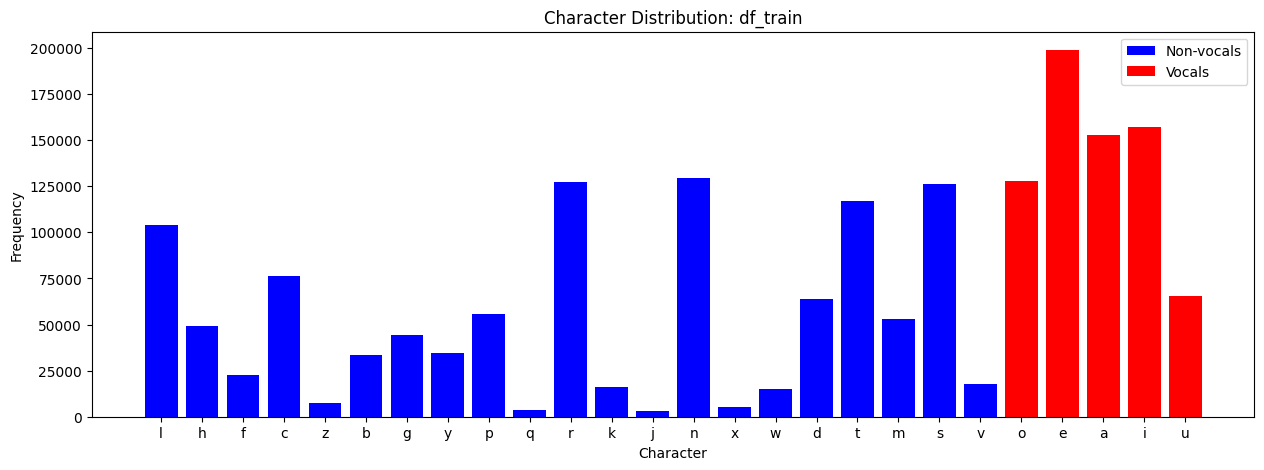

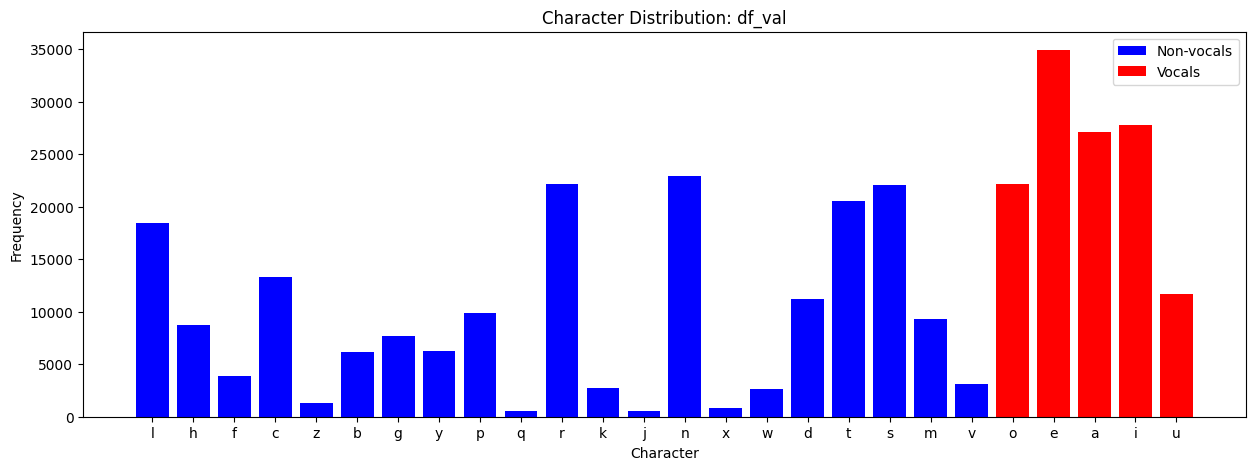

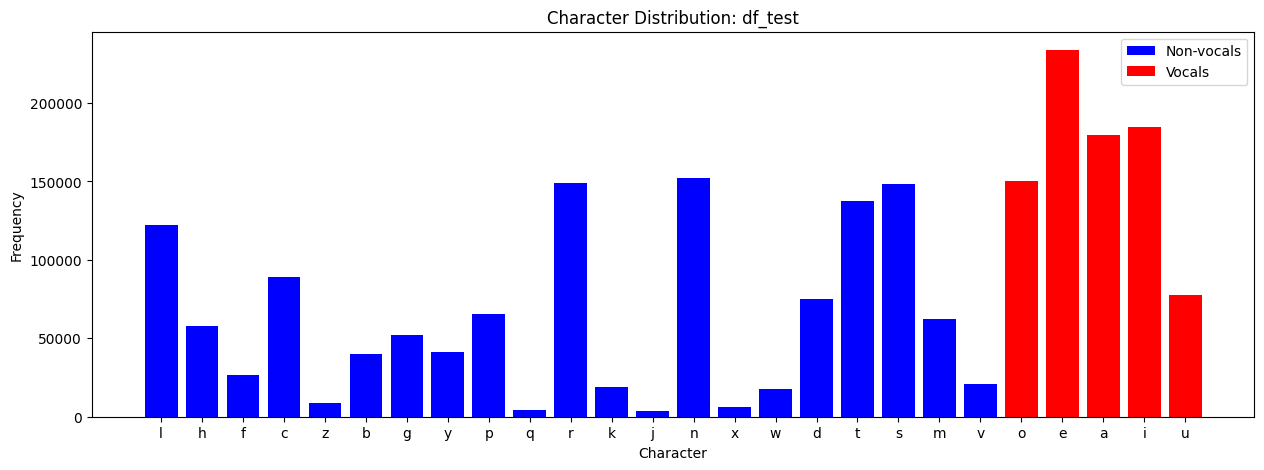

In [7]:
import matplotlib.pyplot as plt

def plot_char_distribution(df, title="df_train"):
    # Get the unique characters in the dataset
    unique_chars = set(''.join(df["word"]))
    char_freq = {char: 0 for char in unique_chars}

    # Count the frequency of each character
    for word in df["word"]:
        for char in word:
            char_freq[char] += 1

    # Define the vocals
    vocals = set('aeiou')

    # Separate the characters and frequencies into vocals and non-vocals
    vocal_chars = [char for char in char_freq.keys() if char in vocals]
    vocal_freqs = [char_freq[char] for char in vocal_chars]
    non_vocal_chars = [char for char in char_freq.keys() if char not in vocals]
    non_vocal_freqs = [char_freq[char] for char in non_vocal_chars]

    # Plot the character distribution
    plt.figure(figsize=(15, 5))
    plt.bar(non_vocal_chars, non_vocal_freqs, color='b', label='Non-vocals')
    plt.bar(vocal_chars, vocal_freqs, color='r', label='Vocals')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title(f'Character Distribution: {title}')
    plt.legend()
    plt.show()

plot_char_distribution(df_train, title="df_train")
plot_char_distribution(df_val, title="df_val")
plot_char_distribution(df_test, title="df_test")

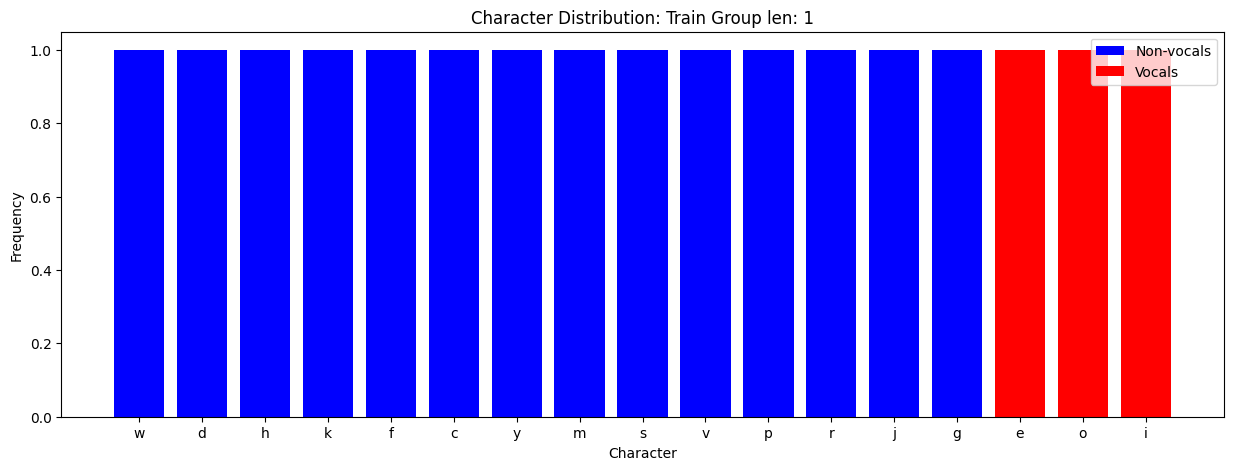

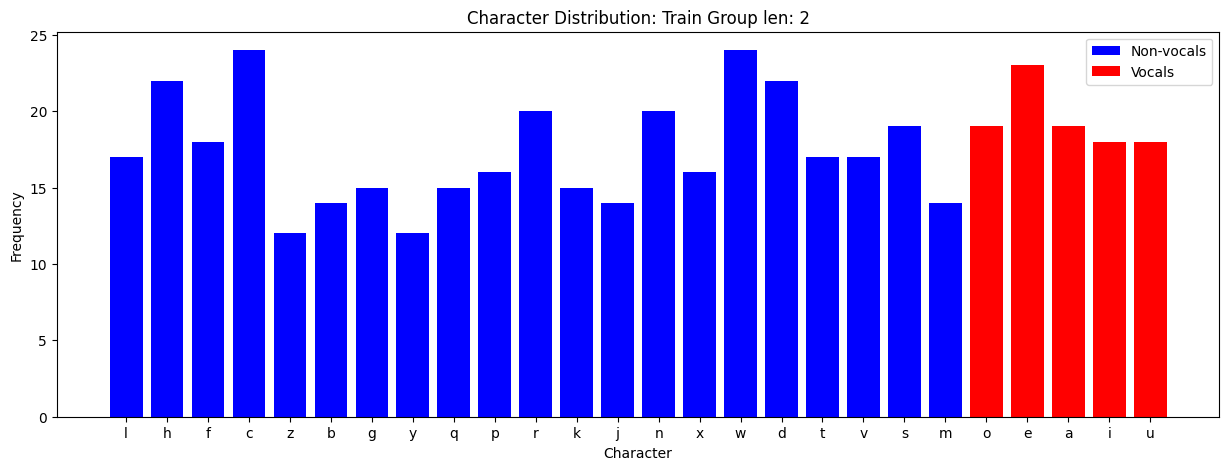

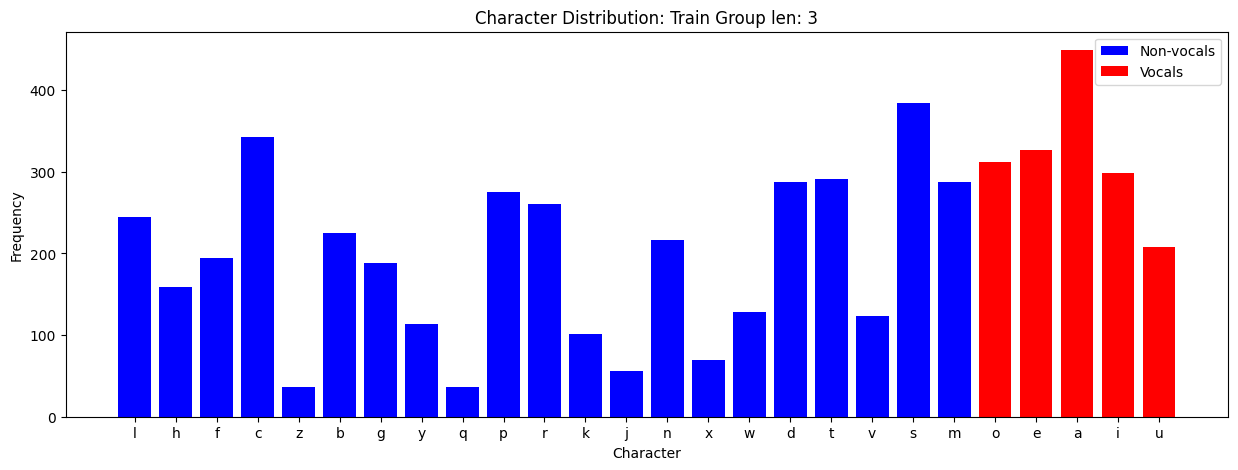

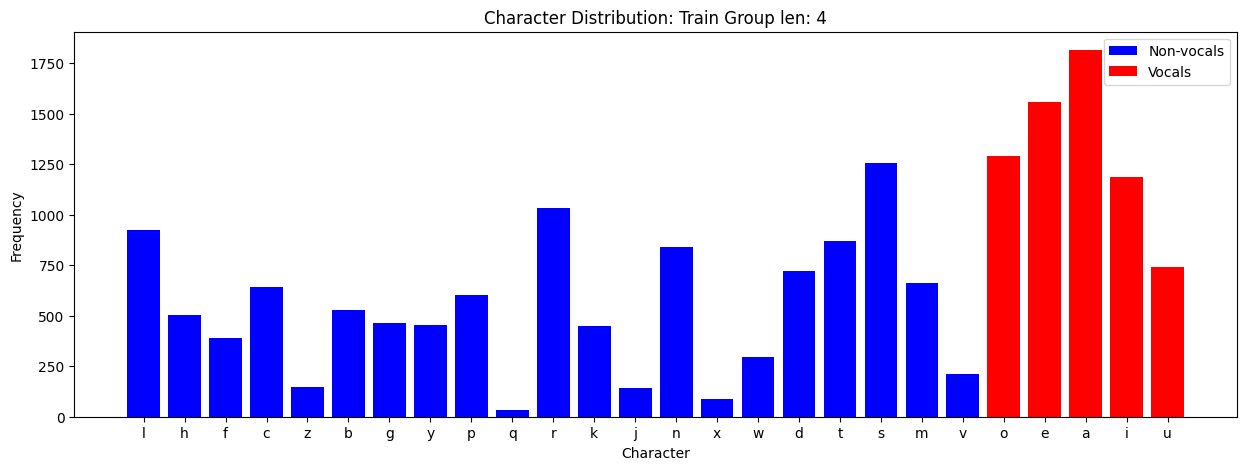

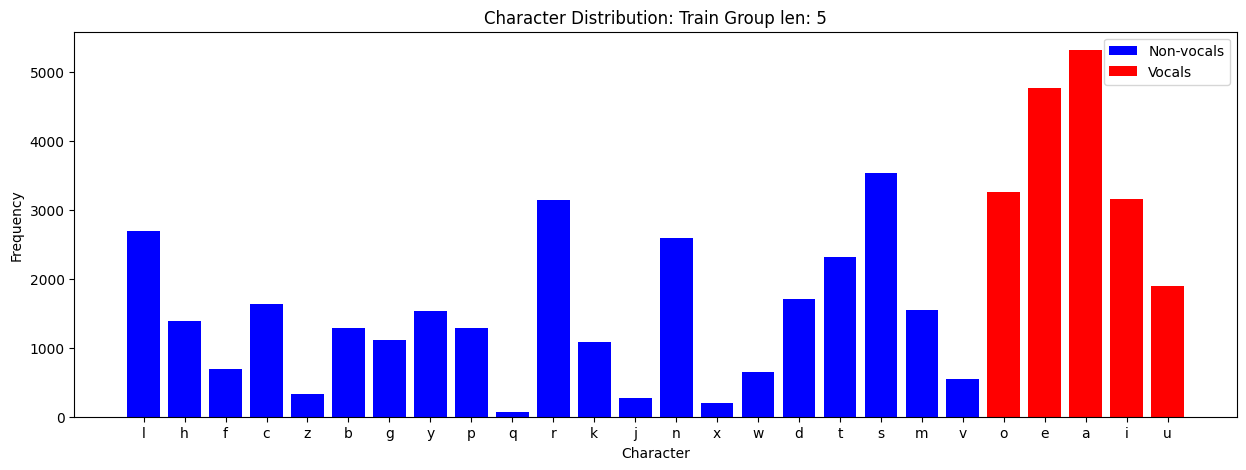

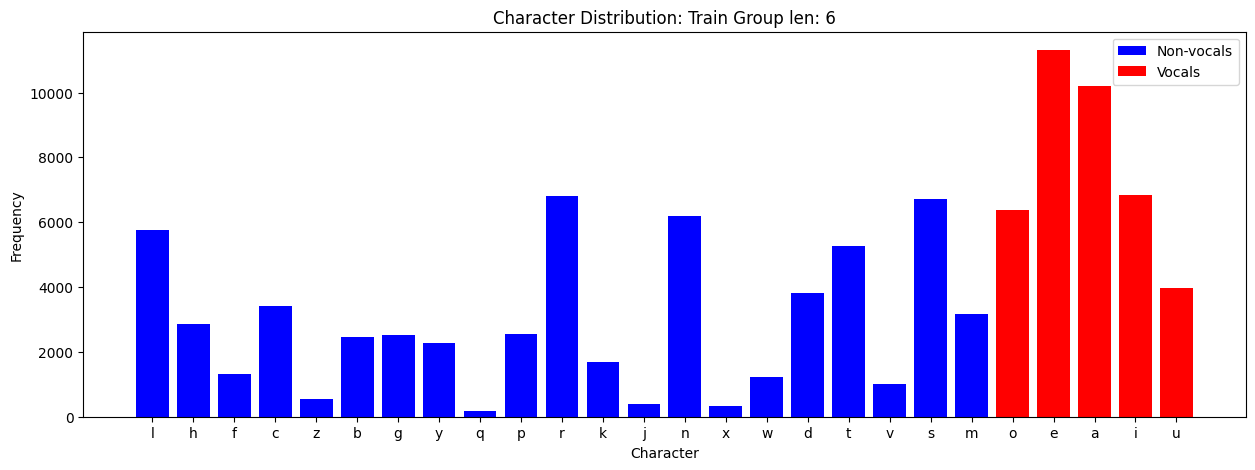

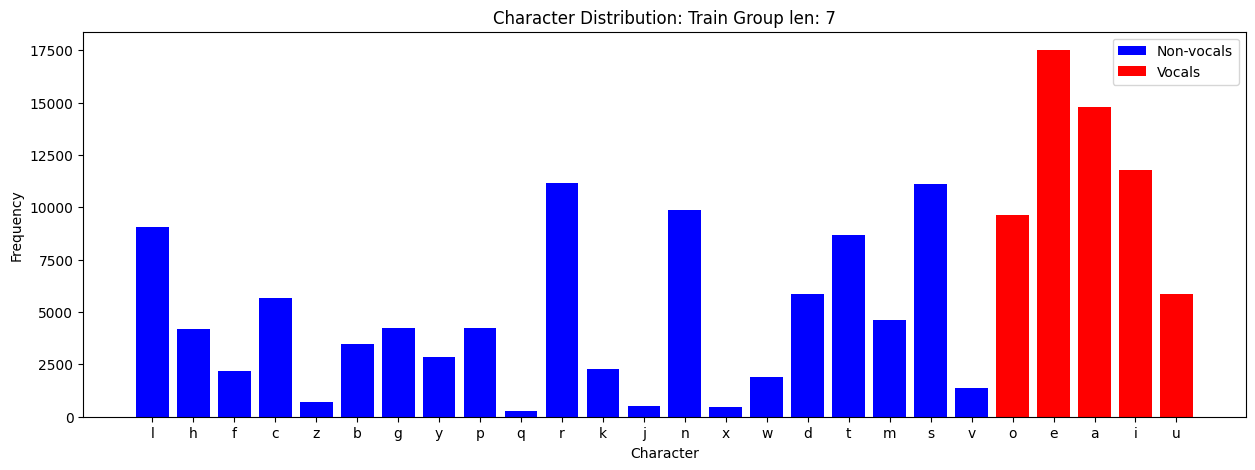

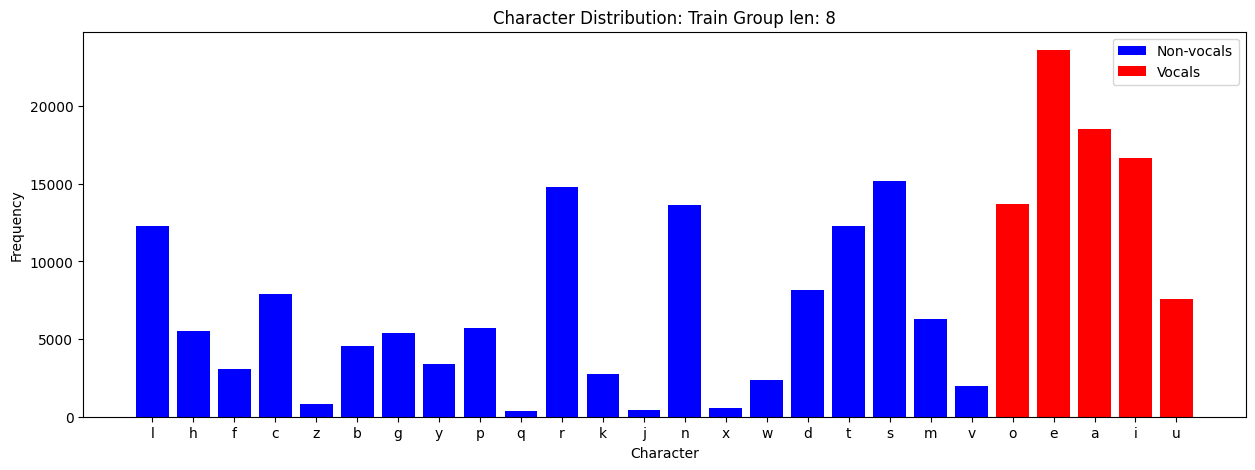

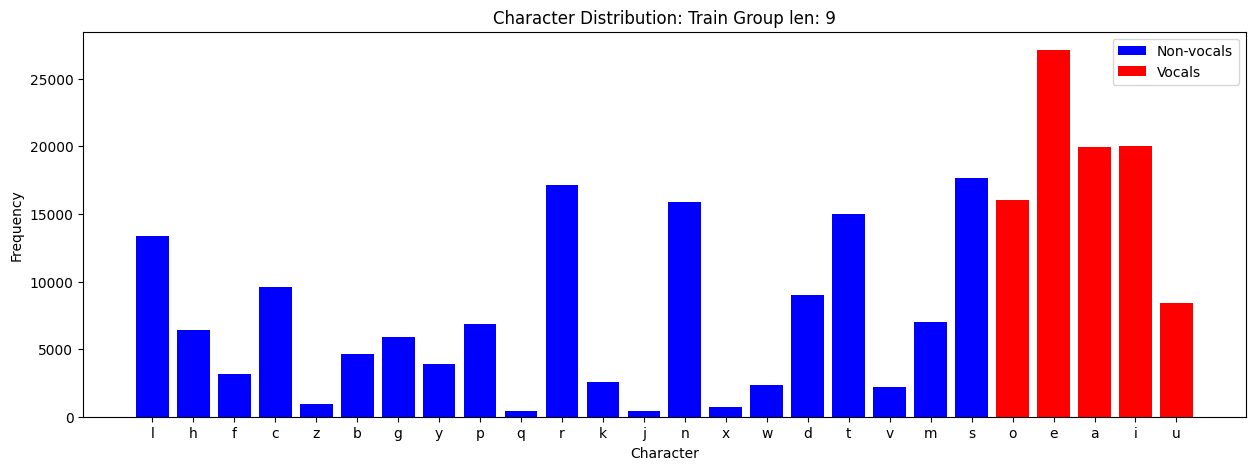

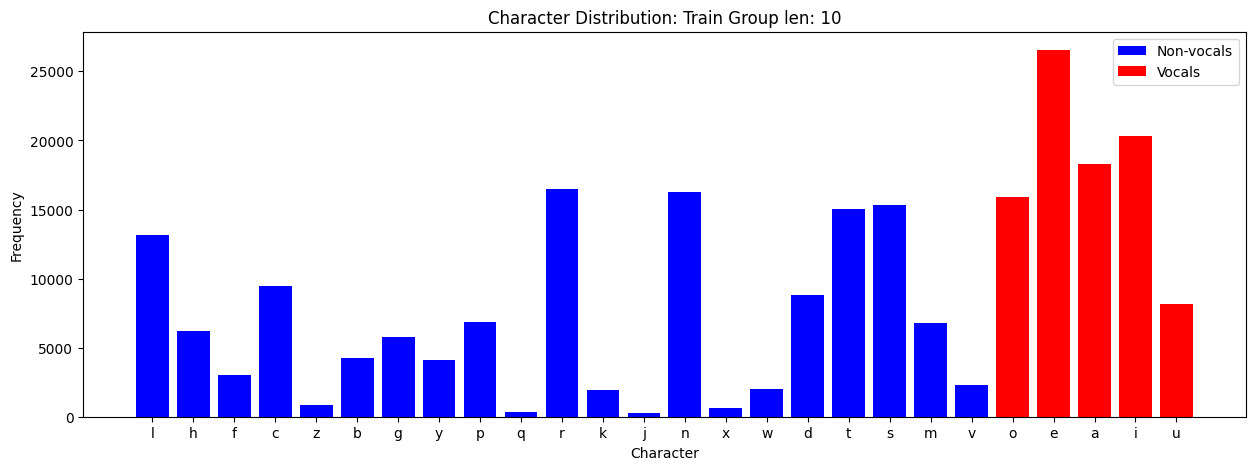

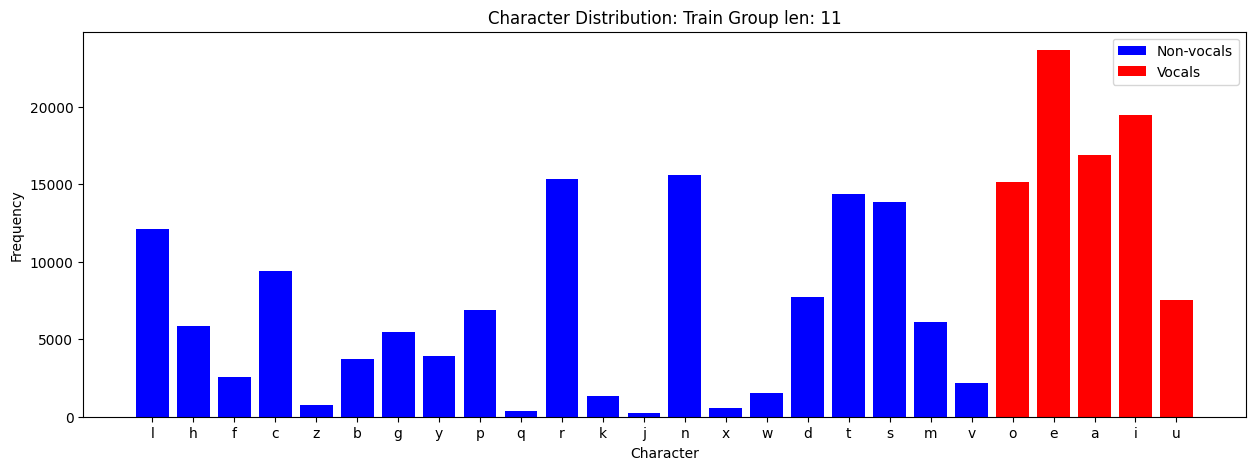

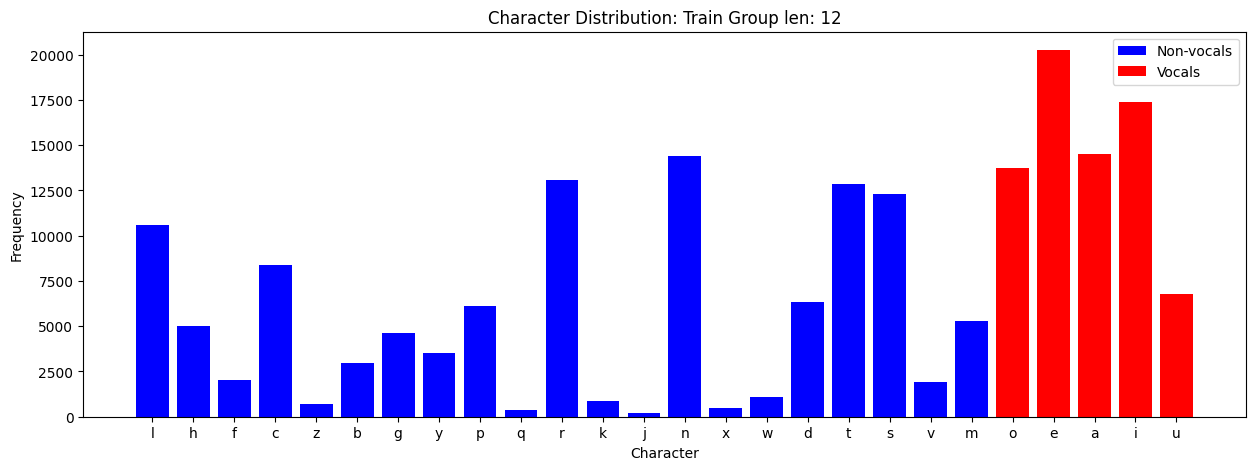

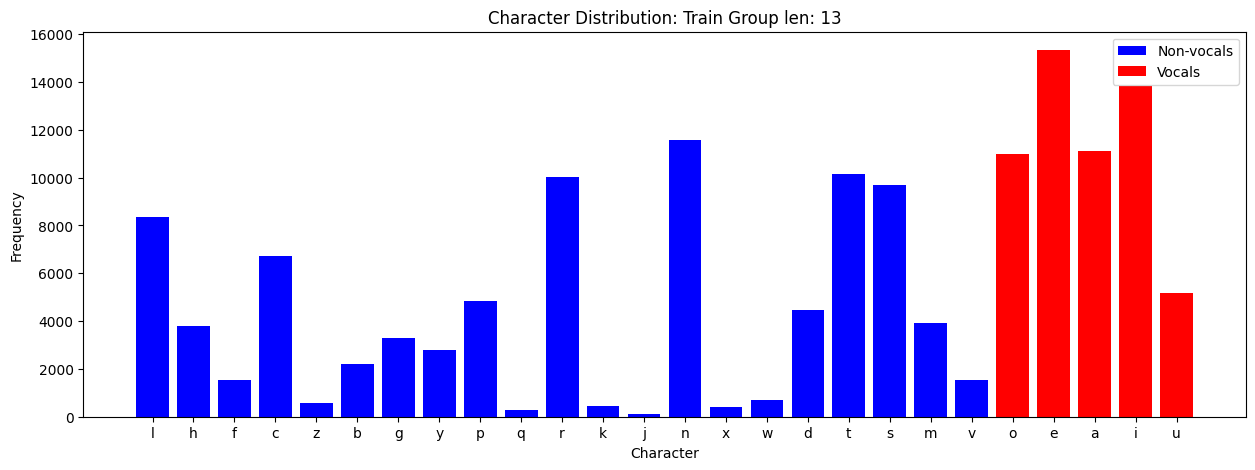

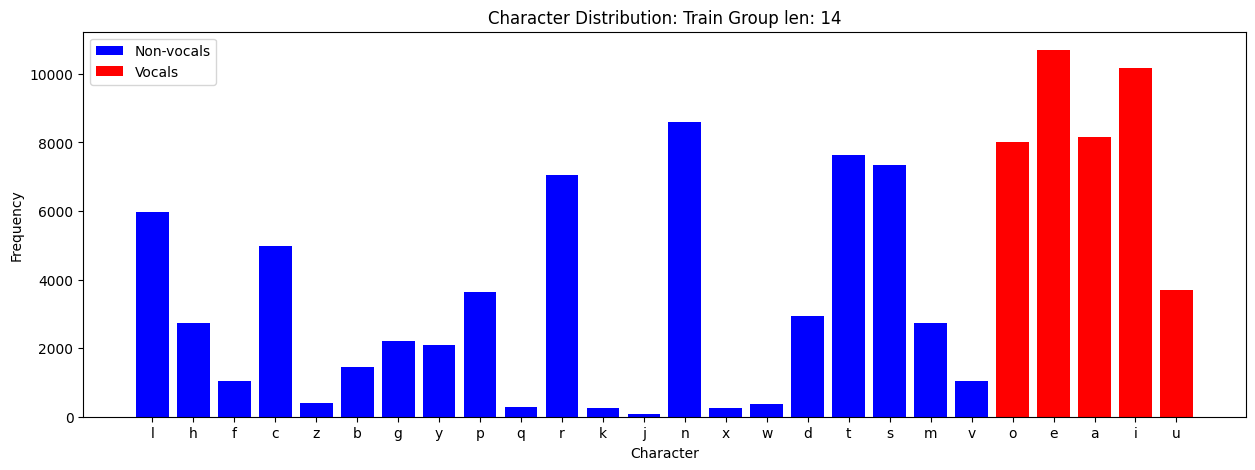

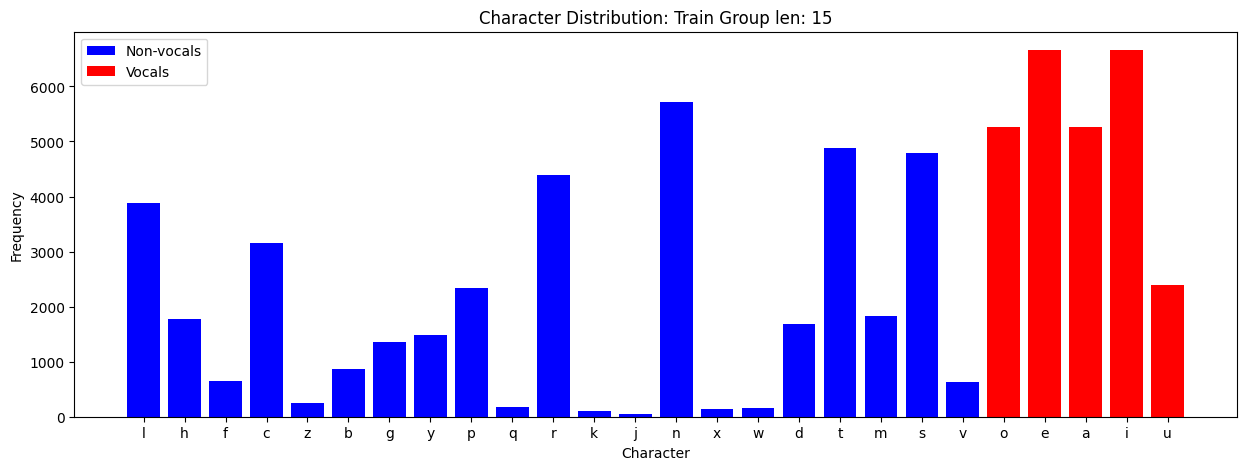

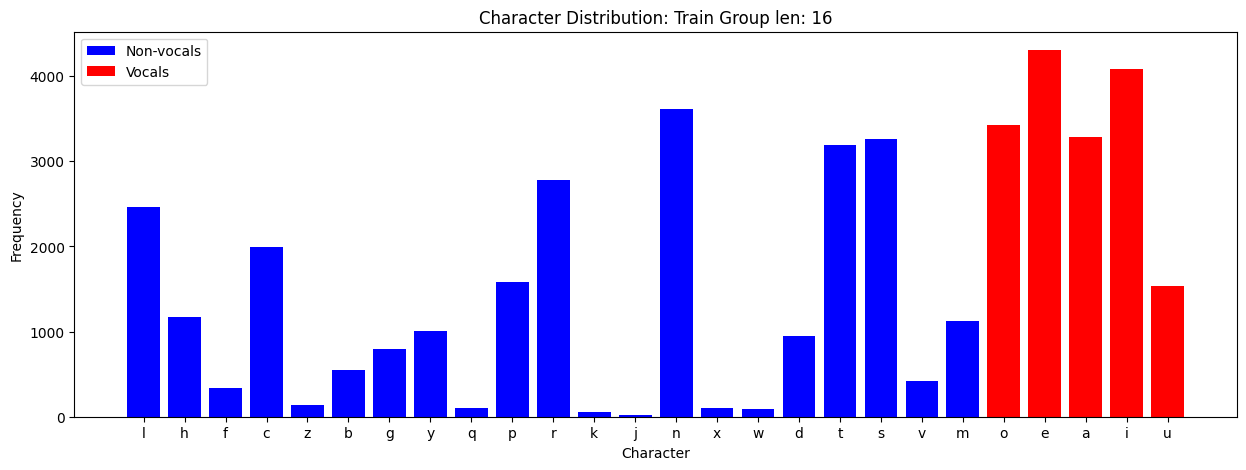

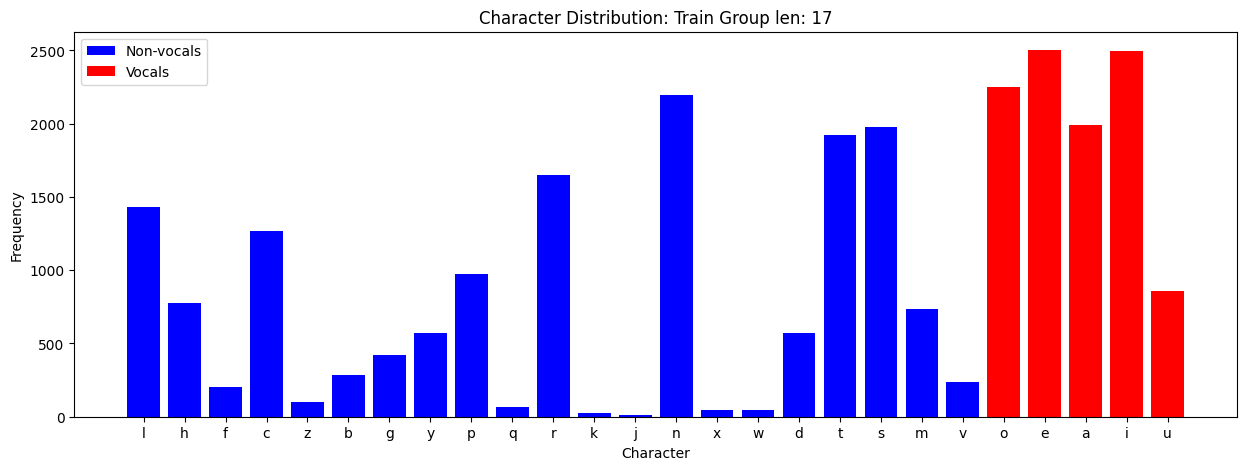

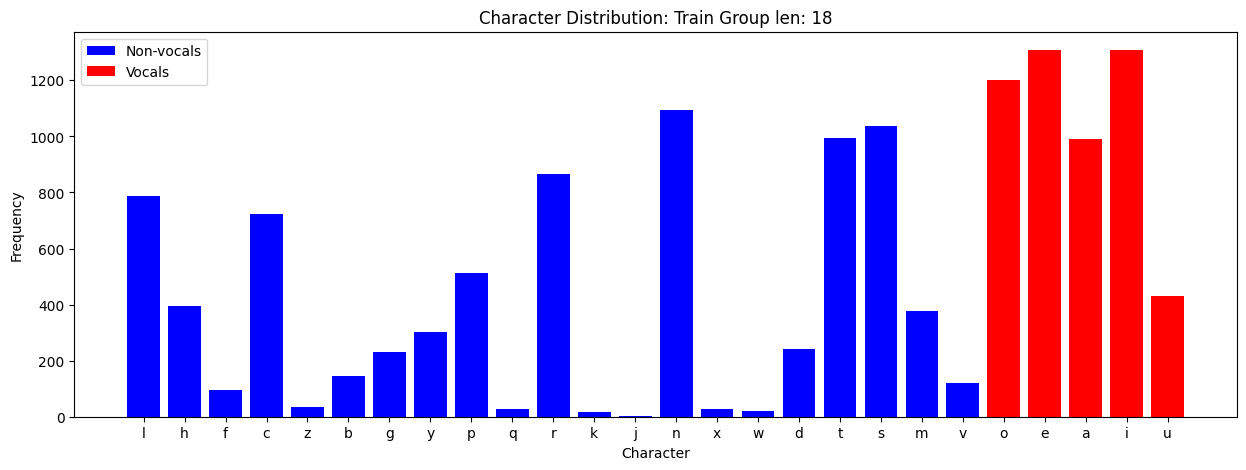

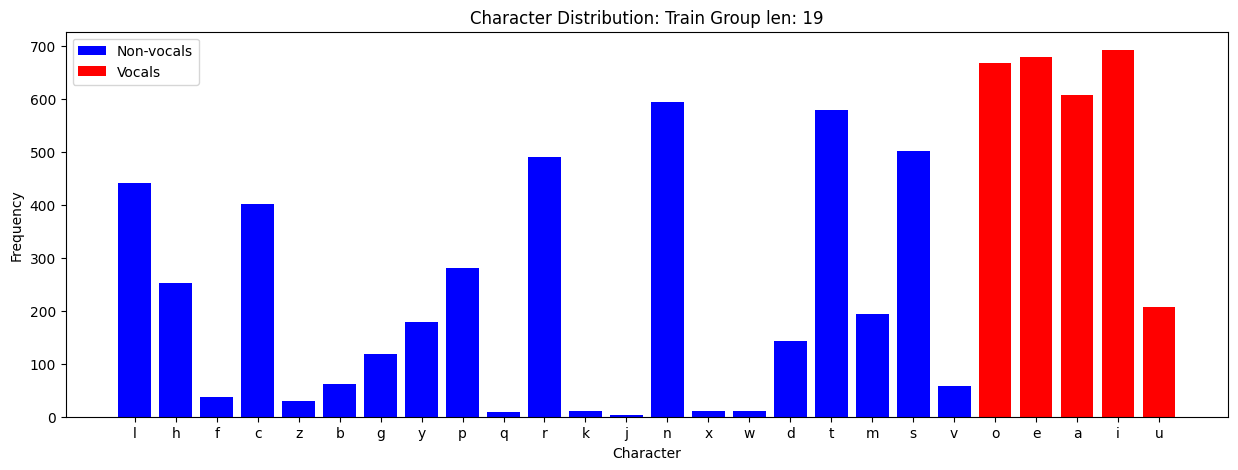

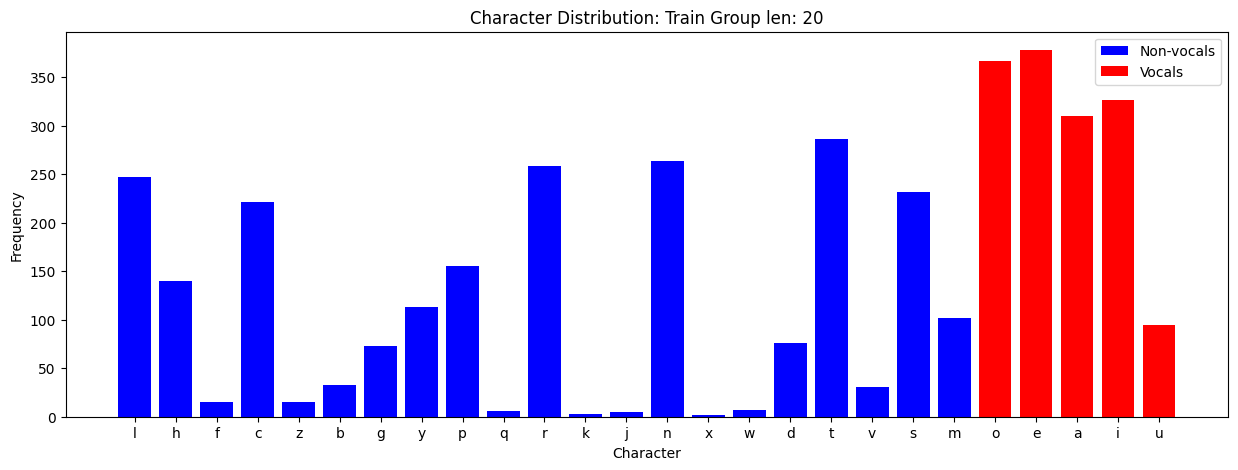

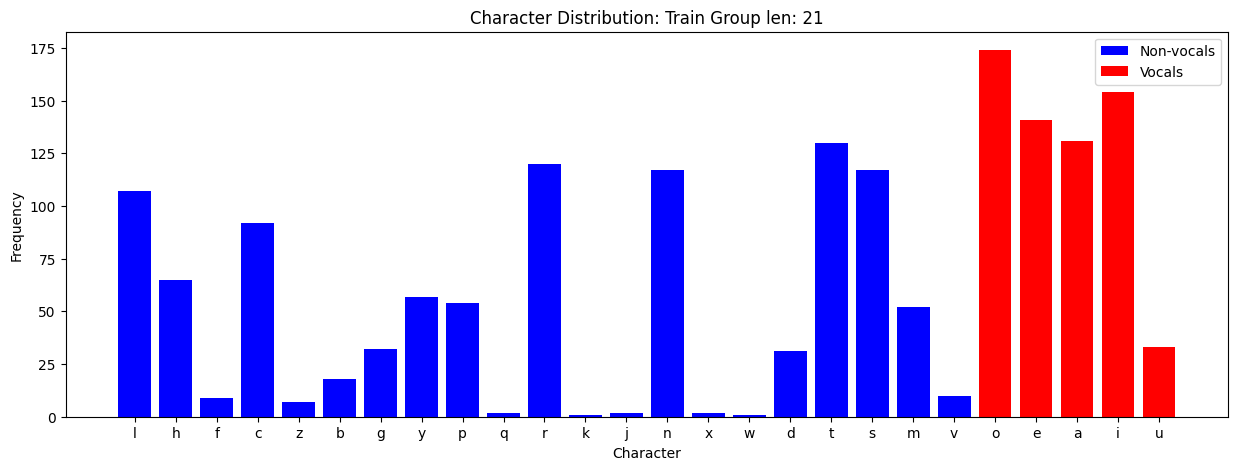

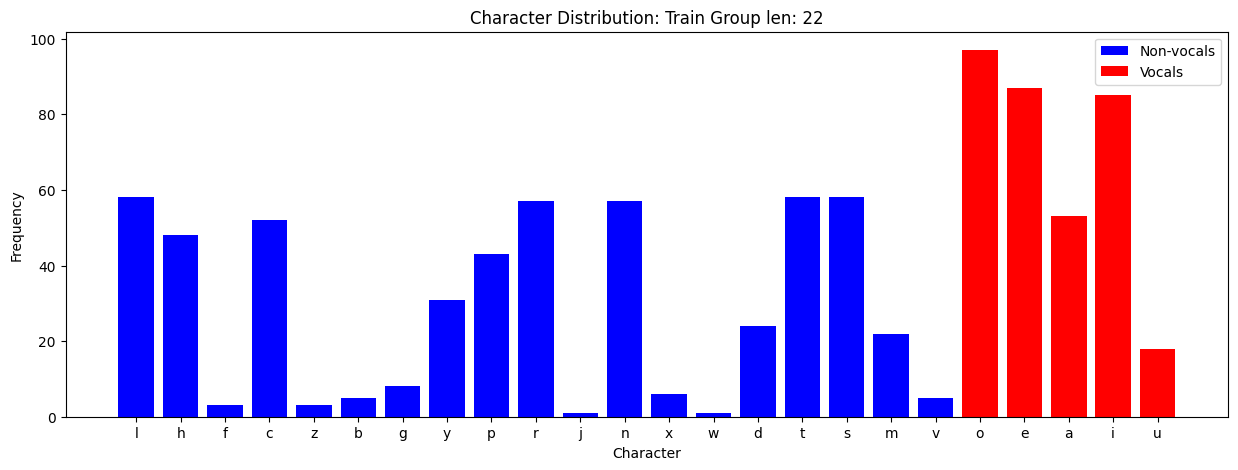

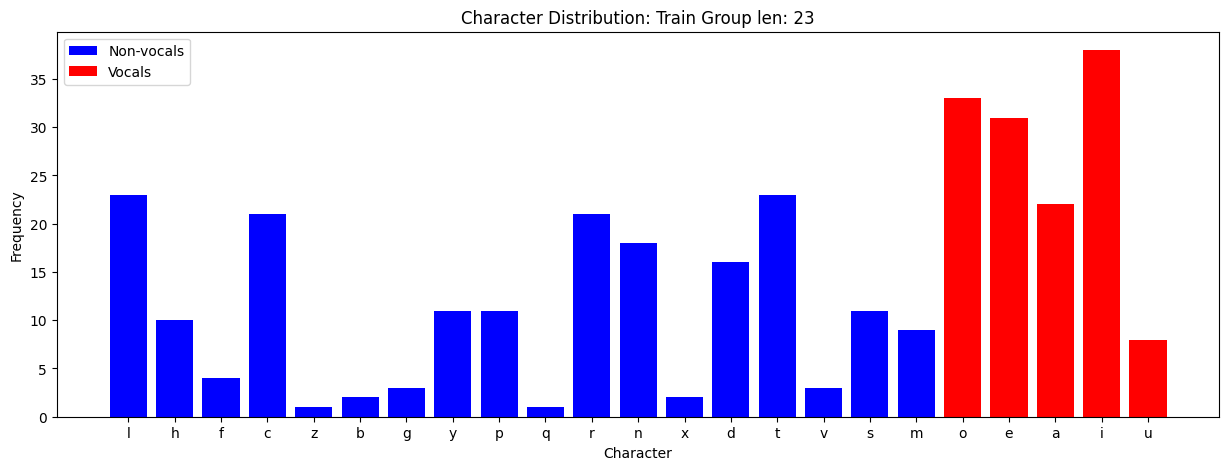

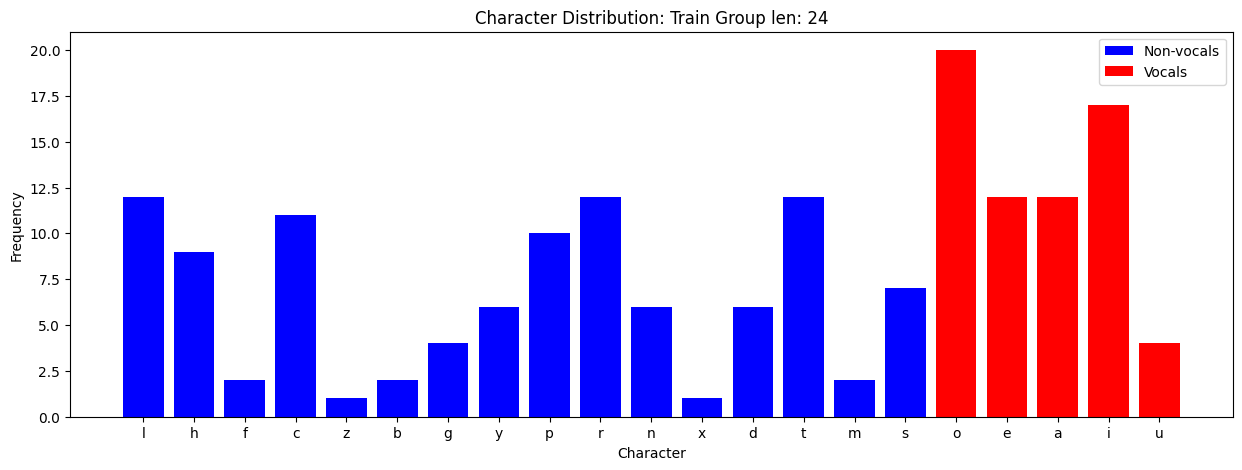

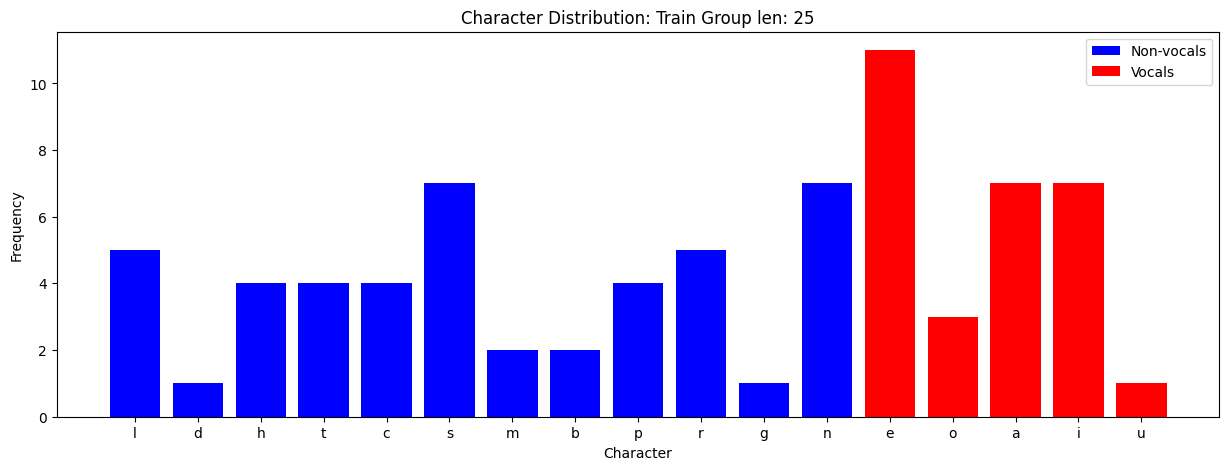

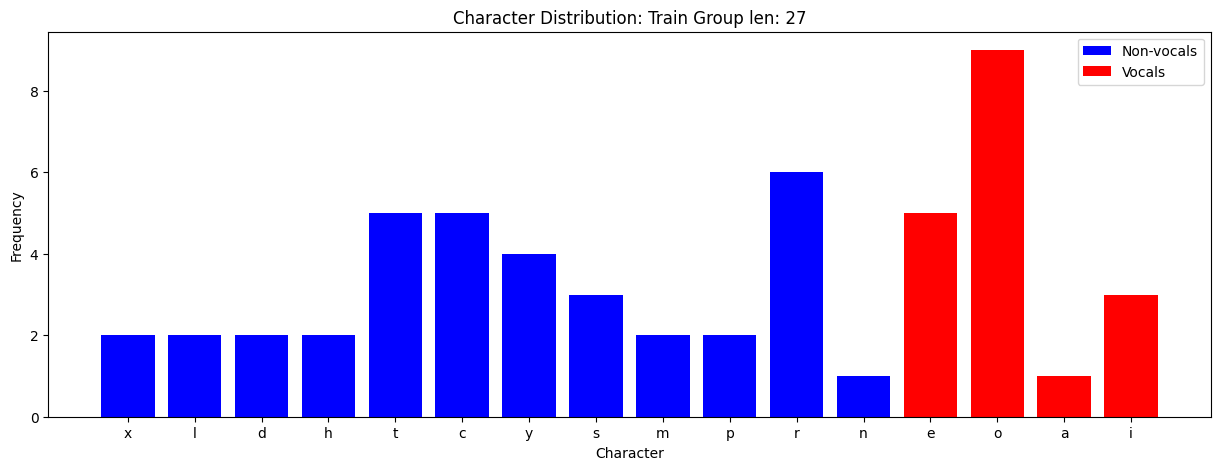

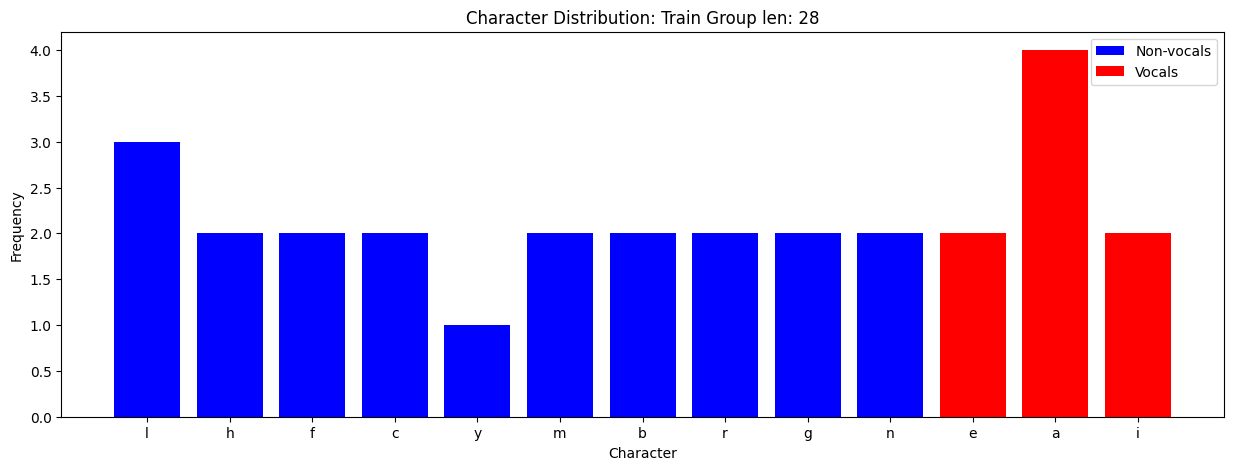

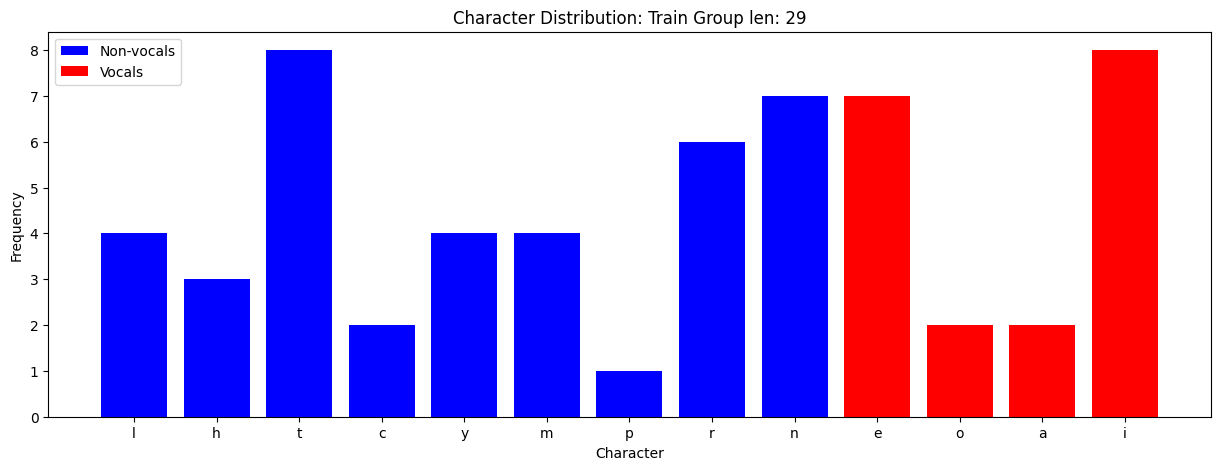

In [9]:
# Get groups of groups of words with the same length
def get_groups(df):
    groups = df.groupby("word_length")["word"].apply(list)
    return groups

# Get the groups of words with the same length
train_groups = get_groups(df_train)
val_groups = get_groups(df_val)
test_groups = get_groups(df_test)

# Plot the distribution of character per group
for group in train_groups:
    plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Train Group len: {len(group[0])}")

# for group in val_groups:
#     plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Val Group len: {len(group[0])}")

# for group in test_groups:
#     plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Test Group len: {len(group[0])}")


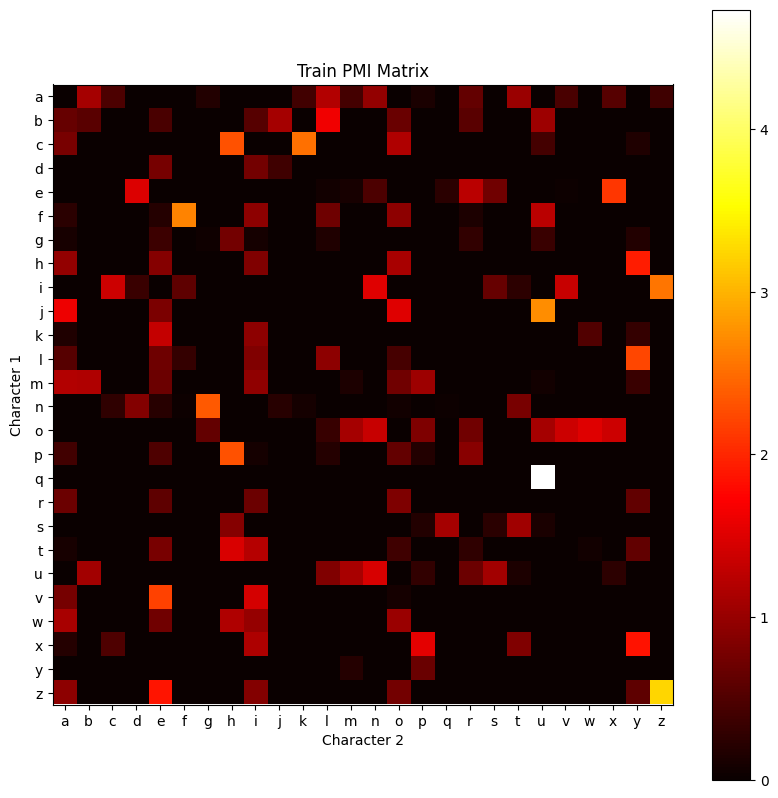

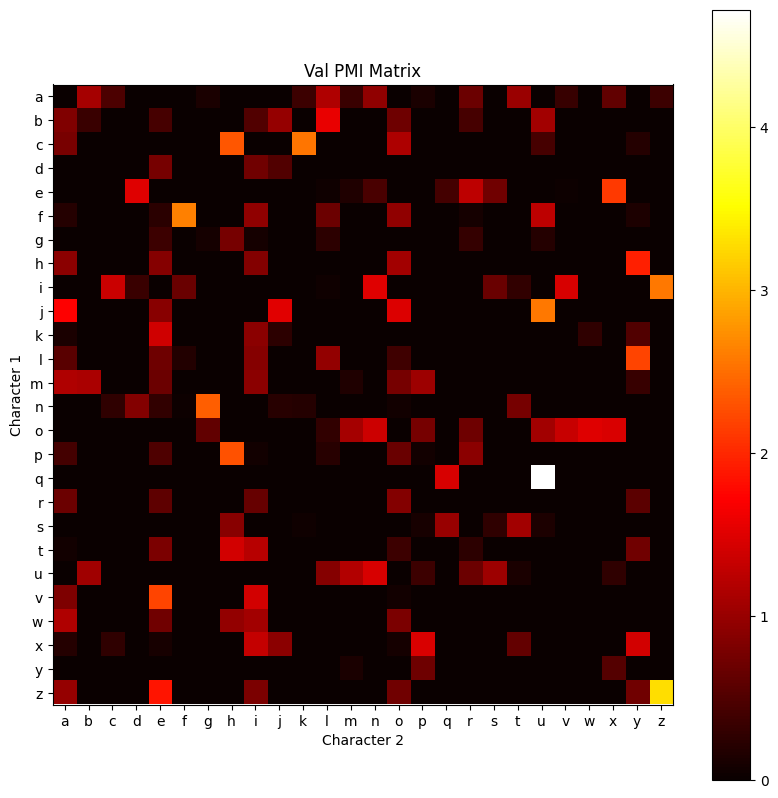

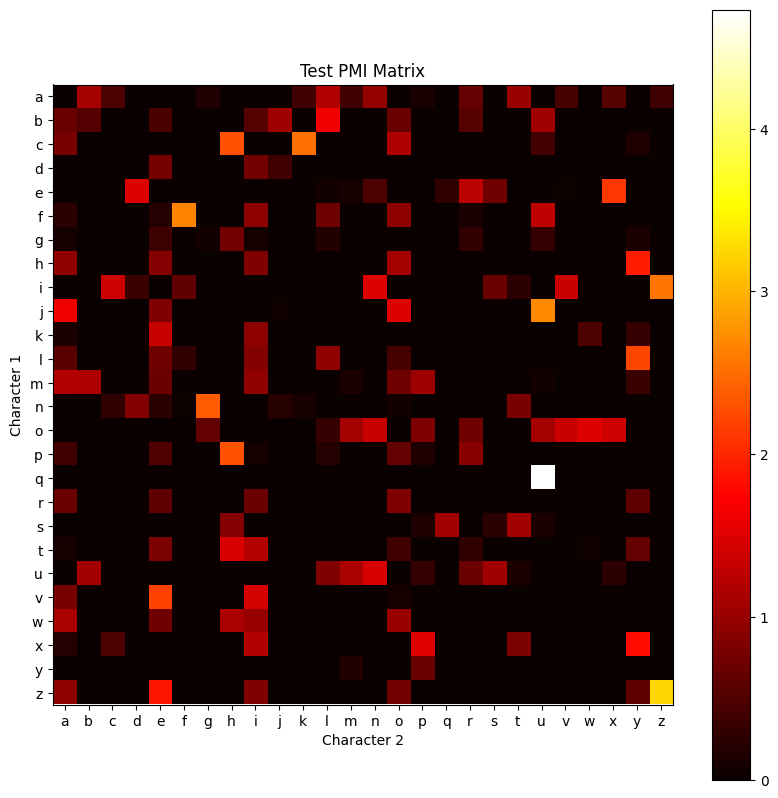

In [23]:
# Calculate the positive pointwise mutual information (PPMI) between characters
import numpy as np

def calculate_pmi(df, k=1):
    # Get the unique characters in the dataset
    unique_chars = set(''.join(df["word"]))
    char_freq = {char: 0 for char in unique_chars}

    # Count the frequency of each character
    for word in df["word"]:
        for char in word:
            char_freq[char] += 1

    # Calculate the total number of characters
    total_chars = sum(char_freq.values())

    # Calculate the probability of each character with k-smoothing
    char_prob = {char: (freq + k) / (total_chars + k * len(unique_chars)) for char, freq in char_freq.items()}

    # Calculate the probability of each pair of characters with k-smoothing
    char_pairs = [(char1, char2) for char1 in unique_chars for char2 in unique_chars]
    char_pair_prob = {pair: 0 for pair in char_pairs}
    for word in df["word"]:
        for i in range(len(word) - 1):
            char_pair_prob[(word[i], word[i + 1])] += 1
    char_pair_prob = {pair: (freq + k) / (total_chars + k * len(char_pairs)) for pair, freq in char_pair_prob.items()}

    # Calculate the pointwise mutual information (PMI) between characters
    char_pmi = {pair: max(np.log2(char_pair_prob[pair] / (char_prob[pair[0]] * char_prob[pair[1]])), 0) for pair in char_pairs}

    return char_pmi

# Plot the the matrix of PPMI values according each pair in trian_char_pmi
def plot_pmi_matrix(char_pmi, title="Train PMI Matrix"):
    # Get the unique characters
    unique_chars = sorted(set([char for pair in char_pmi.keys() for char in pair]))

    # Create a matrix of PPMI values
    pmi_matrix = np.zeros((len(unique_chars), len(unique_chars)))
    for i, char1 in enumerate(unique_chars):
        for j, char2 in enumerate(unique_chars):
            pmi_matrix[i, j] = char_pmi.get((char1, char2), 0)

    # Plot the matrix of PPMI values
    plt.figure(figsize=(10, 10))
    plt.imshow(pmi_matrix, cmap='hot', interpolation='nearest')
    plt.xticks(range(len(unique_chars)), unique_chars)
    plt.yticks(range(len(unique_chars)), unique_chars)
    plt.xlabel('Character 2')
    plt.ylabel('Character 1')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Calculate the PMI for the training set
train_char_pmi = calculate_pmi(df_train)
plot_pmi_matrix(train_char_pmi, title="Train PMI Matrix")

# Calculate the PMI for the validation set
val_char_pmi = calculate_pmi(df_val)
plot_pmi_matrix(val_char_pmi, title="Val PMI Matrix")

# Calculate the PMI for the test set
test_char_pmi = calculate_pmi(df_test)
plot_pmi_matrix(test_char_pmi, title="Test PMI Matrix")


# Data Split